In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

In [25]:
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [26]:
class OurNeuralNetwork:
    def __init__(self):
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        learn_rate = 0.1
        epochs = 1000
        loss_history = []  # List to store the loss at each epoch

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # Forward pass
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # Calculate the gradients and update weights
                d_L_d_ypred = -2 * (y_true - y_pred)
                
                # Backpropagation (Gradient descent updates for weights)
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                # Update weights and biases
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

                # Hidden layer gradients
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # Update hidden weights and biases
                self.w1 -= learn_rate * d_L_d_ypred * self.w5 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * self.w5 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * self.w5 * d_h1_d_b1

                self.w3 -= learn_rate * d_L_d_ypred * self.w6 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * self.w6 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * self.w6 * d_h2_d_b2

            # Calculate loss and store it
            y_preds = np.apply_along_axis(self.feedforward, 1, data)
            loss = mse_loss(all_y_trues, y_preds)
            loss_history.append(loss)  # Append the loss for this epoch

            if epoch % 100 == 0:  # Print loss every 100 epochs
                print("Epoch %d loss: %.3f" % (epoch, loss))

        # Plot the loss history after training
        plt.plot(loss_history)
        plt.title('Training Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid()
        plt.show()

In [27]:
data = np.array([
    [2104, 3],
    [1600, 3],
    [2400, 3],
    [1416, 2],
    [3000, 4],
    [1985, 4],
    [1534, 3],
    [1427, 3],
    [1380, 3],
    [1494, 3]
])

In [28]:
data[:, 0] = data[:, 0] / 3000  # normalize area
data[:, 1] = data[:, 1] / 4     # normalize bathrooms

In [29]:
all_y_trues = np.array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1])


Epoch 0 loss: 0.232
Epoch 100 loss: 0.182
Epoch 200 loss: 0.165
Epoch 300 loss: 0.160
Epoch 400 loss: 0.157
Epoch 500 loss: 0.155
Epoch 600 loss: 0.154
Epoch 700 loss: 0.154
Epoch 800 loss: 0.153
Epoch 900 loss: 0.153


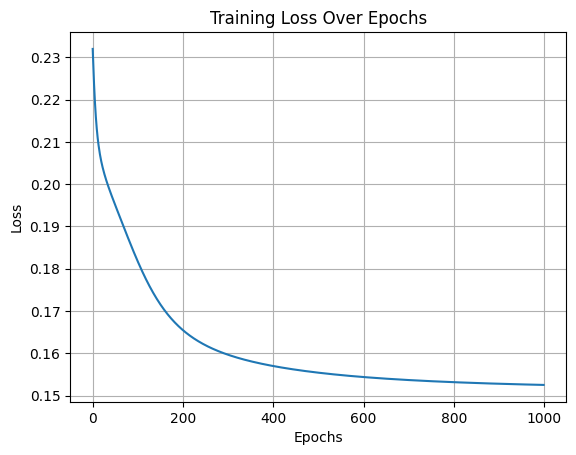

In [30]:
network = OurNeuralNetwork()
network.train(data, all_y_trues)